In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import functions as f 

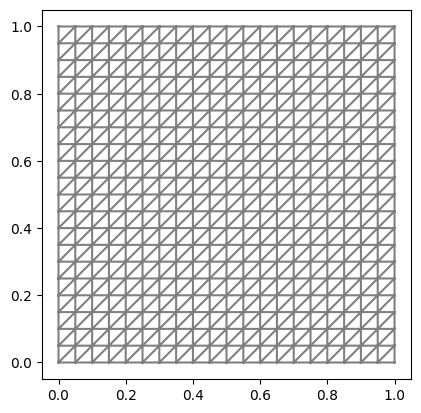

In [3]:
mesh = UnitSquareMesh(20,20)
plot(mesh)

In [6]:
# V = FunctionSpace(mesh,"P",2)
# vs = Expression('V_plus*tanh(x[1]/csi_plus)*tanh((1-x[1])/csi_plus)*(0.5+0.5*tanh((x[0]-c_H)*pow(epsilon,-1))) \
#                 - V_minus*tanh(x[1]/csi_minus)*tanh(pow(1-x[1],2)/csi_minus)*(0.5+0.5*tanh((c_H-x[0])*pow(epsilon,-1)))',
#                 V_plus=V_plus,V_minus=V_minus,csi_minus=csi_minus,csi_plus=csi_plus,c_H=c_H,epsilon=epsilon,degree=2)
# vs = interpolate(vs,V)
# sol = plot(vs)
# plt.colorbar(sol)
# plt.xlabel('c')
# plt.ylabel('s')
# plt.title('v_s')
# plt.show()

In [7]:
# P = Expression('p_csc*pow(x[0],4)/(pow(K_csc,4)+pow(x[0],4))*exp(-pow((x[1]-s_csc)/g_csc,2)) \
#                + p_dc*pow(x[0],4)/(pow(K_dc,4)+pow(x[0],4))*exp(-pow((x[1]-s_dc)/g_dc,2))',
#                p_csc=p_csc,p_dc=p_dc,K_csc=K_csc,K_dc=K_dc,g_csc=g_csc,g_dc=g_dc,s_csc=s_csc,s_dc=s_dc,degree=2)
# K = Expression('d_tdc * exp(-((1-x[1])/g_tdc)) + d_n * (0.5+0.5*tanh((c_N-x[0])/epsilon_k))',
#                d_tdc=d_tdc,d_n=d_n,g_tdc=g_tdc,epsilon_k=epsilon_k,c_N=c_N,degree=2)
# F = Expression("P-K", degree=2, P=P, K=K)
# F = interpolate(F,V)
# sol = plot(F)
# plt.colorbar(sol)
# plt.xlabel('c')
# plt.ylabel('s')
# plt.title('P-K')
# plt.axvline(c_N,color='r')
# plt.show()


In [8]:
# test case 1
m0 = 1e-3
dt = 0.1
T = 420
save_interval = 500

n_vect,c_vect,mass = f.solver(mesh,m0,dt,T,save_interval)

time=1: 
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
iter=1: norm=0.00143869
Solving linear variational problem.
iter=2: norm=2.27357e-06
Solving linear variational problem.
time=2: 
Solving linear variational problem.
iter=1: norm=4.89442e-05
Solving linear variational problem.
time=3: 
Solving linear variational problem.
iter=1: norm=5.10799e-05
Solving linear variational problem.
time=4: 
Solving linear variational problem.
iter=1: norm=5.32319e-05
Solving linear variational problem.time=5: 

Solving linear variational problem.
iter=1: norm=5.54739e-05
Solving linear variational problem.
time=6: 
Solving linear variational problem.
iter=1: norm=5.78094e-05
Solving linear variational problem.
time=7: 
Solving linear variational problem.
iter=1: norm=6.02421e-05
Solving linear variational problem.
time=8: 
Solving linear variational problem.
iter=1: norm=6.27757e-05
Solving linear variational problem.
time=9: 
Solving linear va

In [20]:
# test case 2
m02 = 1e-4
dt = 0.1
T = 420
save_interval = 500

n_vect2,c_vect2,mass2 = f.solver(mesh,m02,dt,T,save_interval)

time=1: 
Solving linear variational problem.
iter=1: norm=0.000144076
Solving linear variational problem.
time=2: 
Solving linear variational problem.
iter=1: norm=4.92327e-06
Solving linear variational problem.
time=3: 
Solving linear variational problem.
iter=1: norm=5.10794e-06
Solving linear variational problem.
time=4: 
Solving linear variational problem.
iter=1: norm=5.32332e-06
Solving linear variational problem.
time=5: 
Solving linear variational problem.
iter=1: norm=5.54775e-06
Solving linear variational problem.
time=6: 
Solving linear variational problem.
iter=1: norm=5.78156e-06
Solving linear variational problem.
time=7: 
Solving linear variational problem.
iter=1: norm=6.02512e-06
Solving linear variational problem.
time=8: 
Solving linear variational problem.
iter=1: norm=6.27879e-06
Solving linear variational problem.
time=9: 
Solving linear variational problem.
iter=1: norm=6.54298e-06
Solving linear variational problem.
time=10: 
Solving linear variational problem.


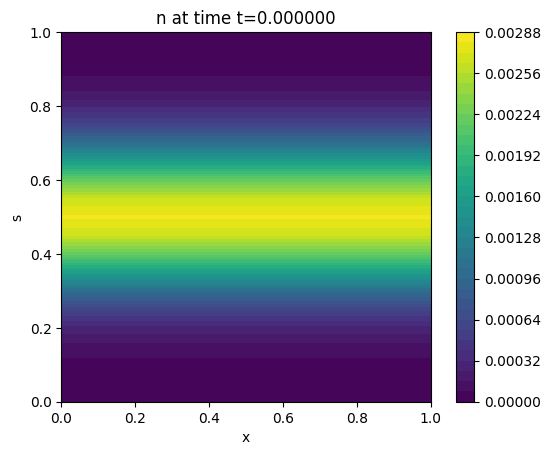

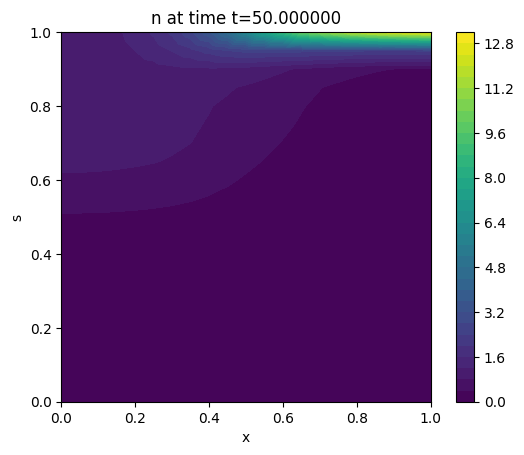

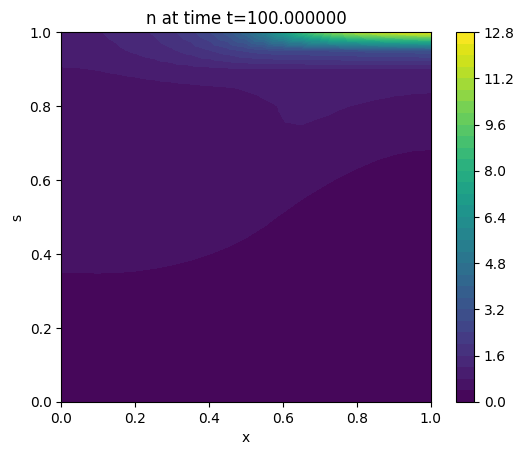

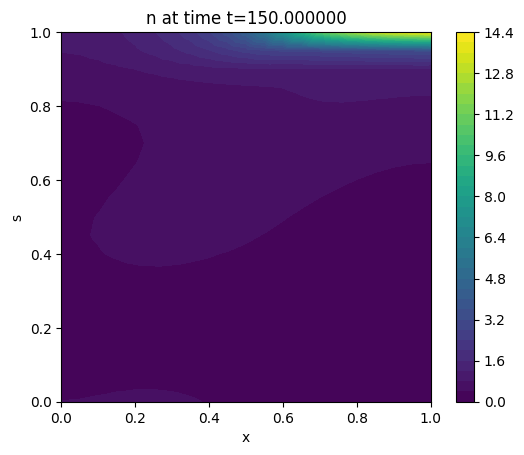

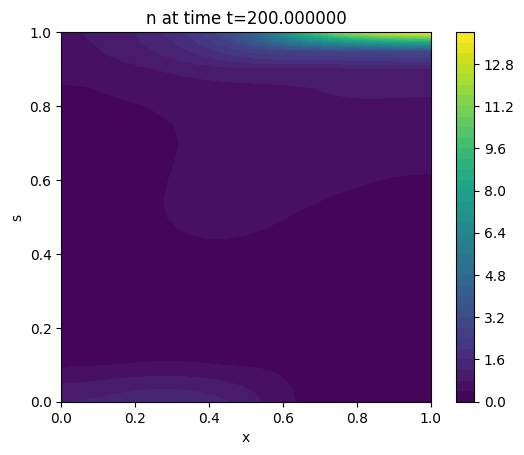

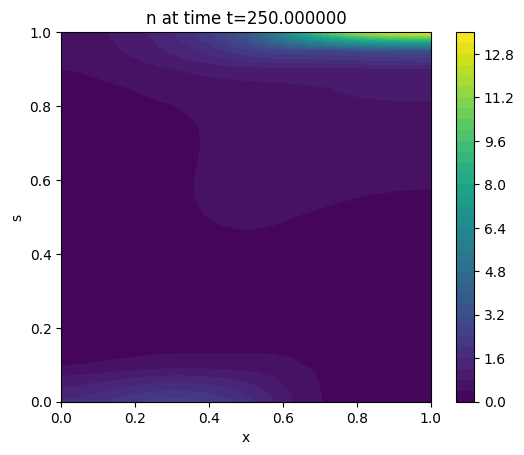

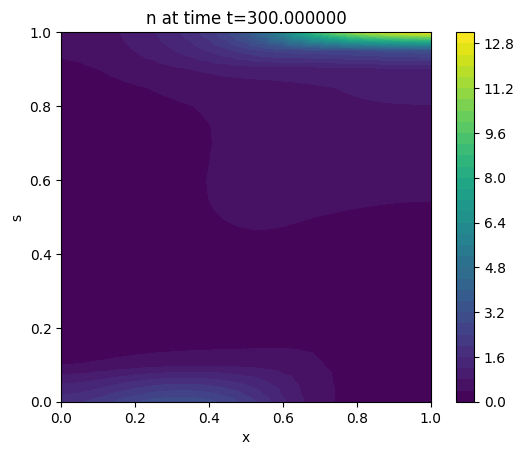

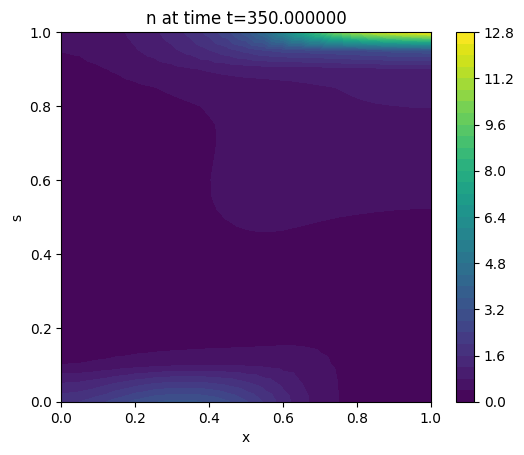

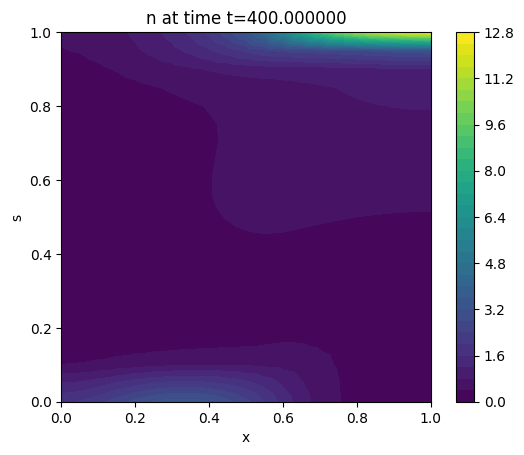

In [16]:
V = FunctionSpace(mesh,"P",2)
N = Function(V)
for i,n in enumerate(n_vect):
    N.vector().set_local(n)
    sol = plot(N)
    plt.colorbar(sol)
    plt.title('n at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.ylabel('s')
    plt.show()

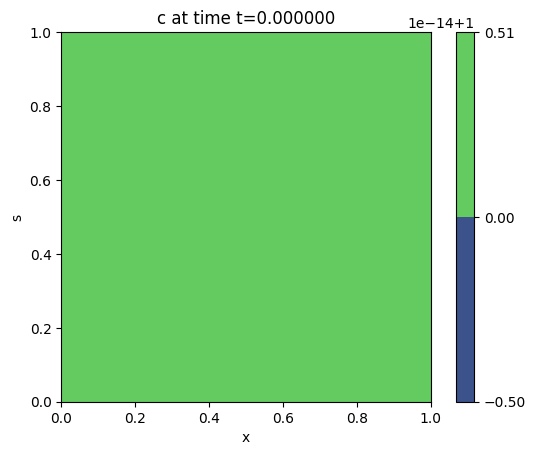

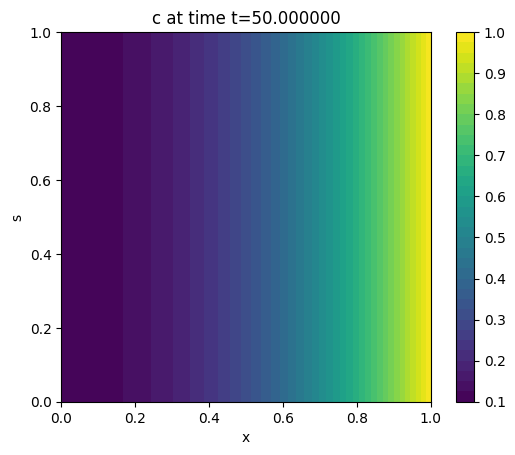

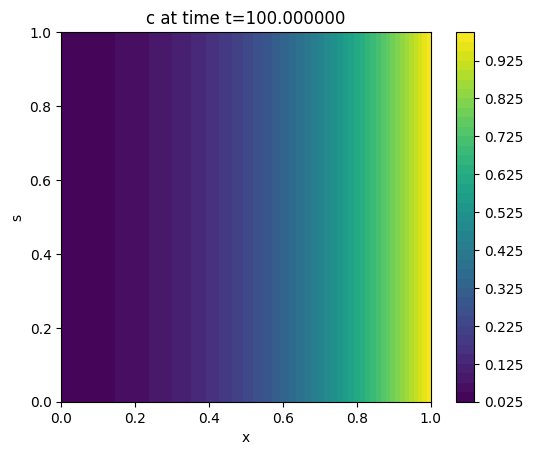

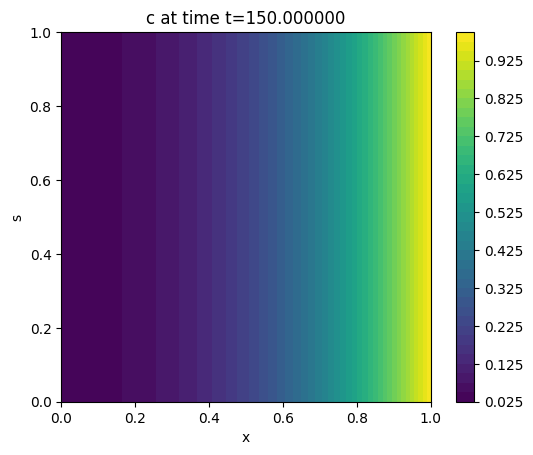

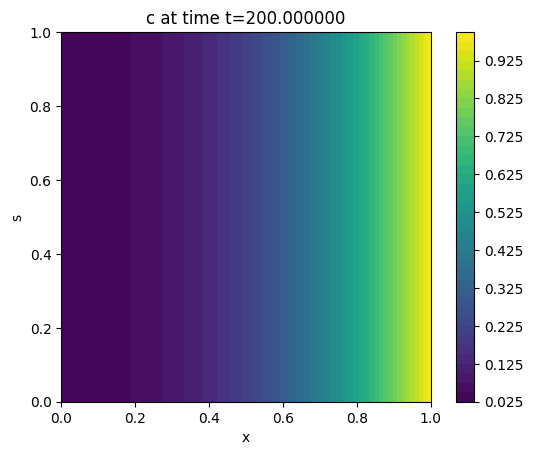

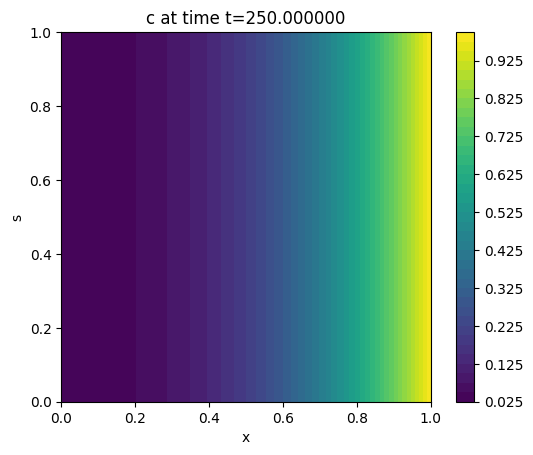

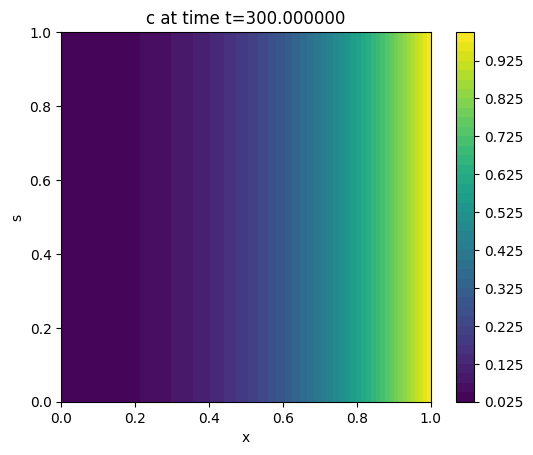

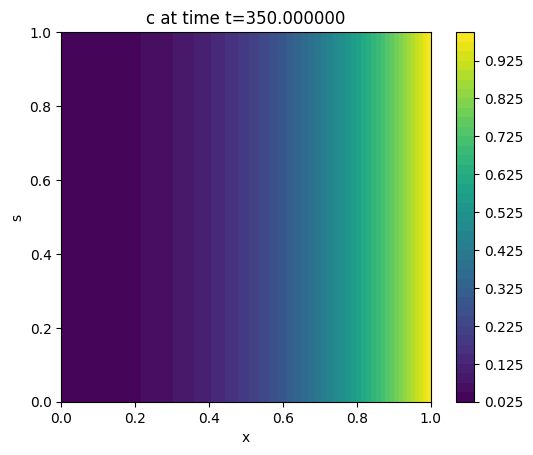

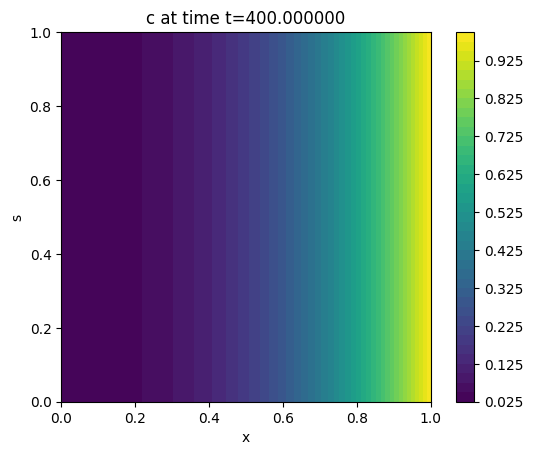

In [17]:
C = Function(V)
for i,c in enumerate(c_vect):
    C.vector().set_local(c)
    sol = plot(C)
    plt.colorbar(sol)
    plt.title('c at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.ylabel('s')
    plt.show()

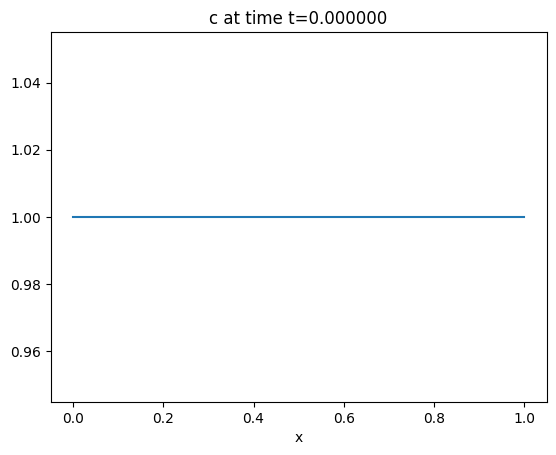

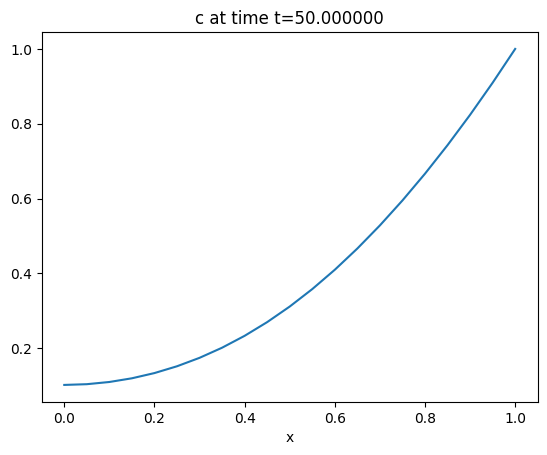

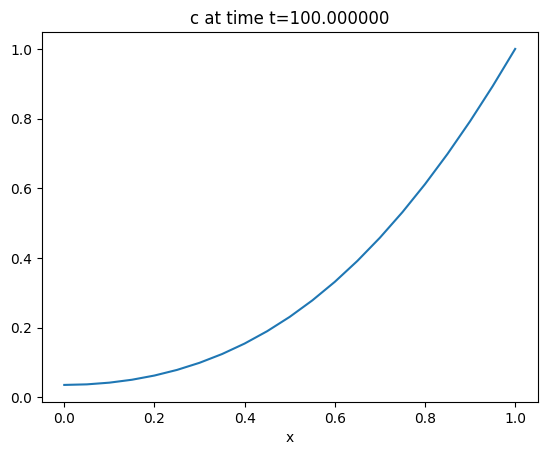

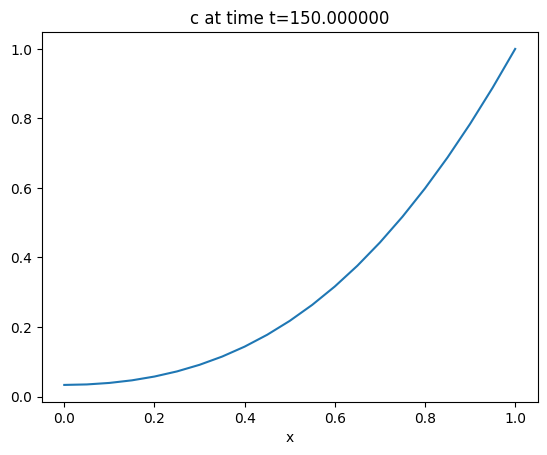

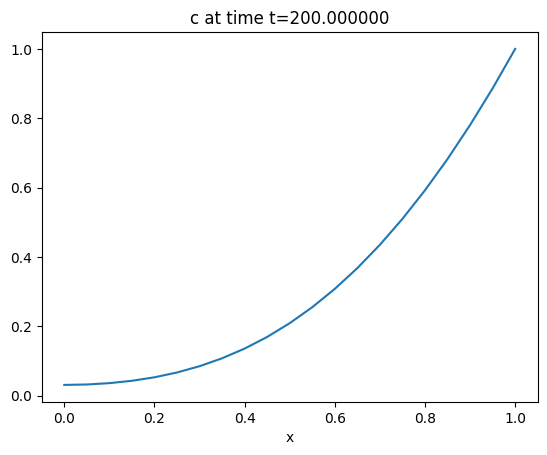

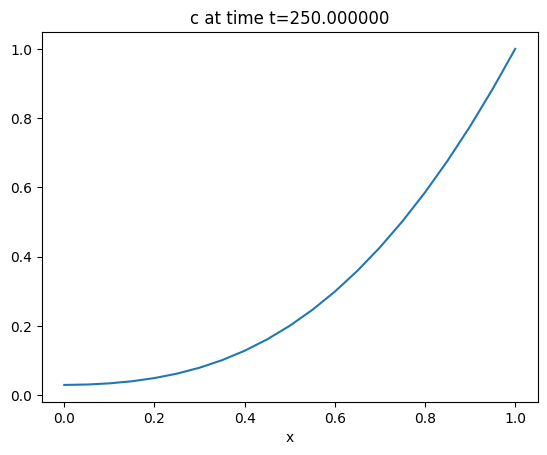

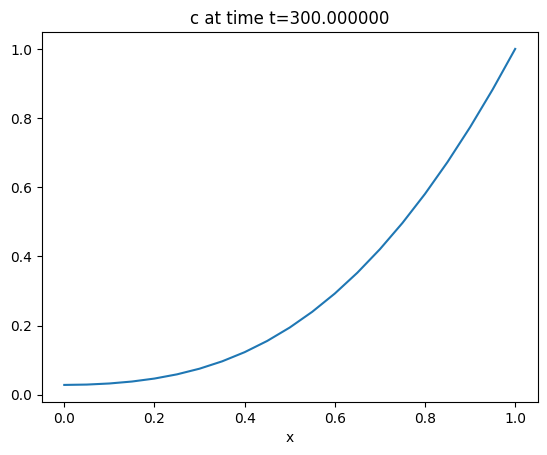

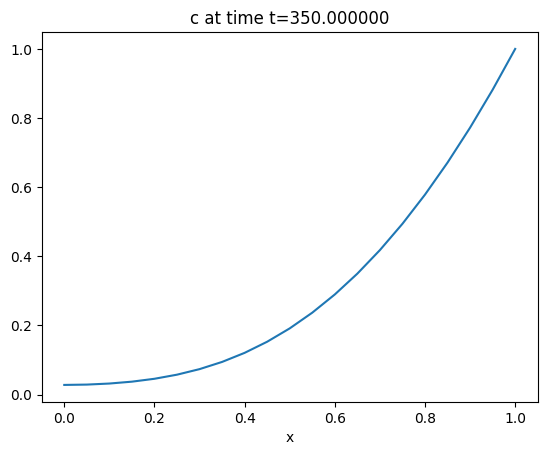

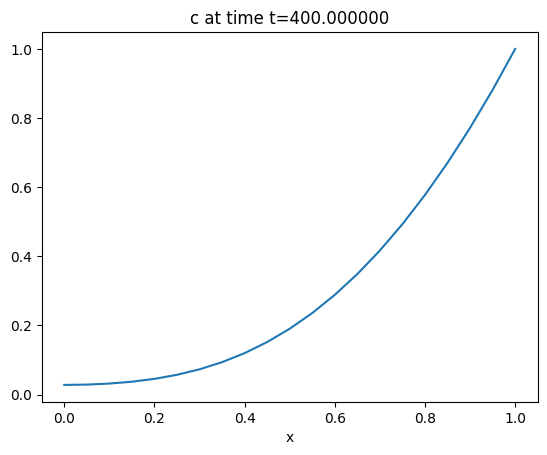

In [18]:
mesh1D = IntervalMesh(20,0,1)
V1D = FunctionSpace(mesh1D,'CG',1)
for i,c in enumerate(c_vect):
    C.vector().set_local(c)
    c1D = interpolate(C,V1D)
    sol = plot(c1D)
    plt.title('c at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.show()


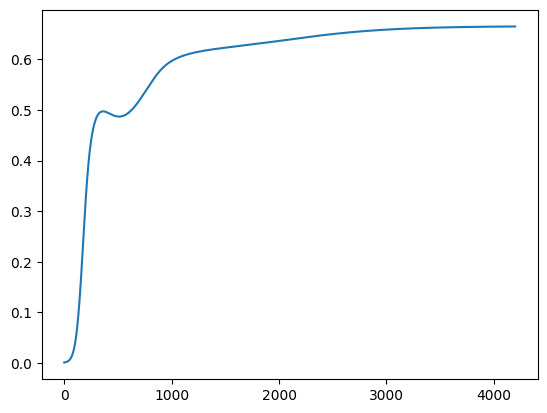

In [19]:
plt.plot(mass)

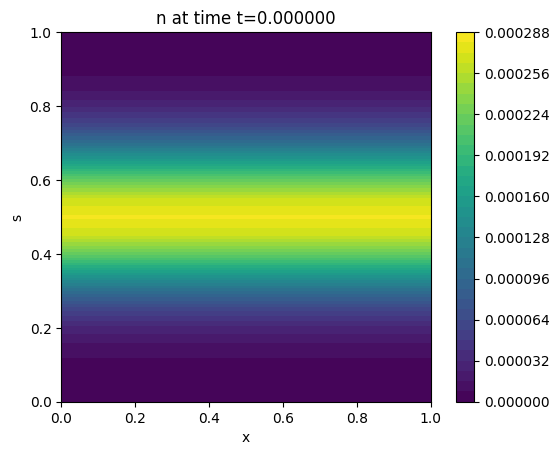

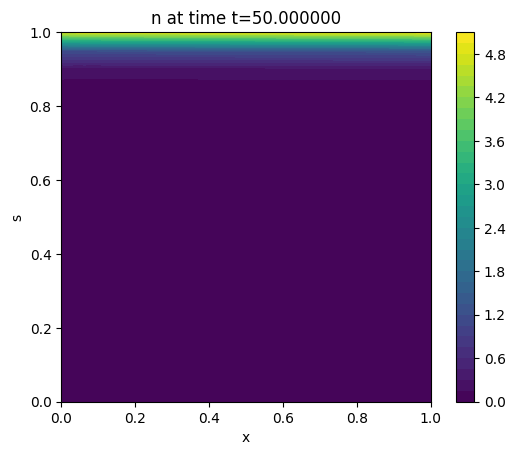

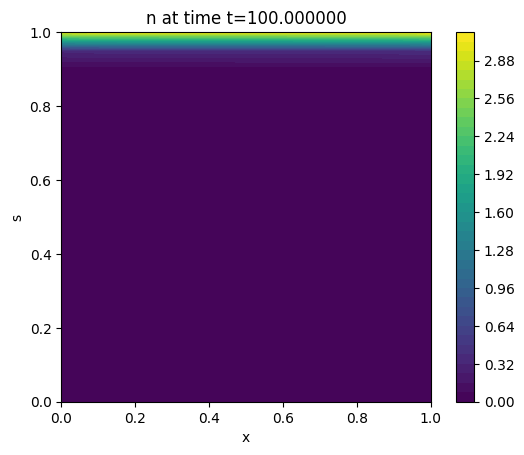

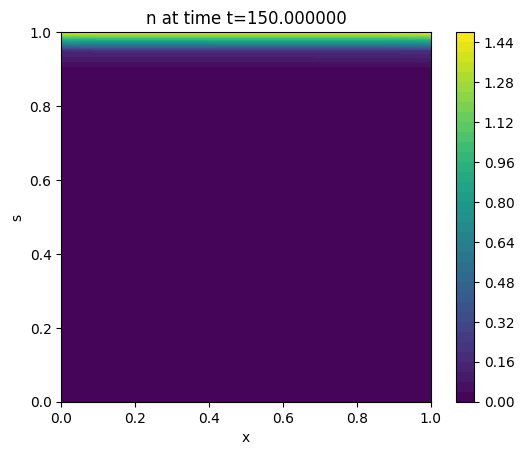

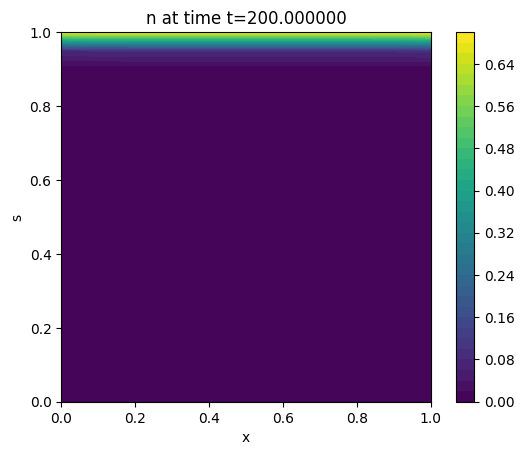

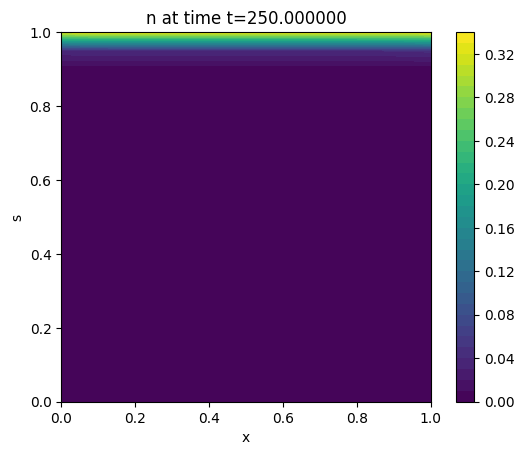

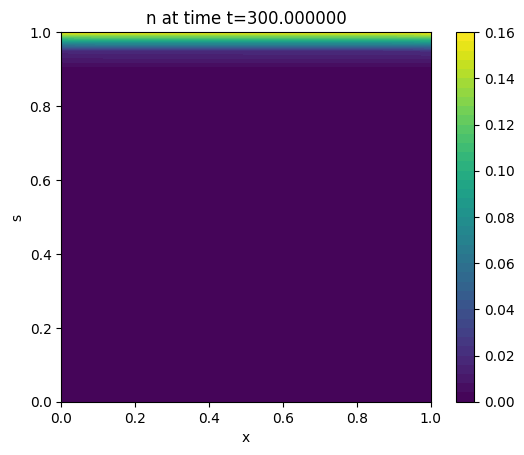

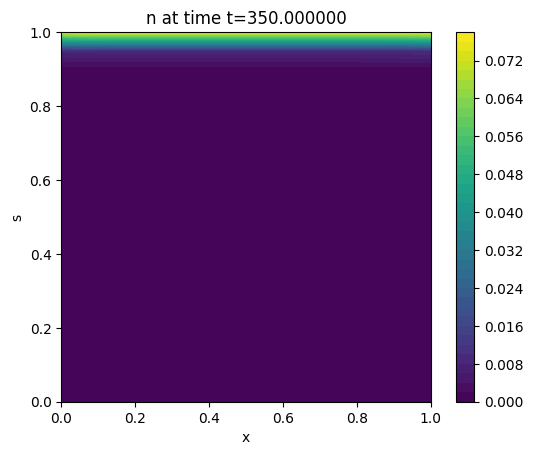

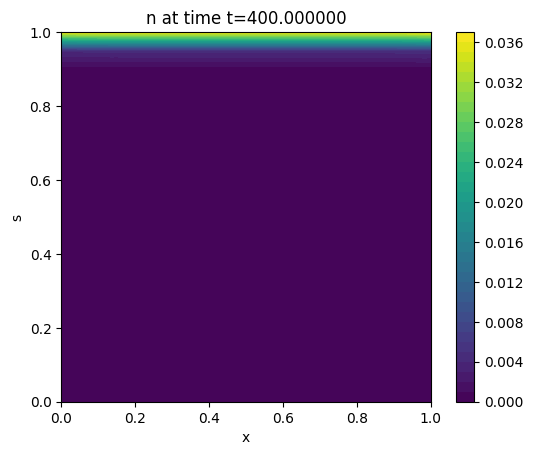

In [21]:
V = FunctionSpace(mesh,"P",2)
N = Function(V)
for i,n in enumerate(n_vect2):
    N.vector().set_local(n)
    sol = plot(N)
    plt.colorbar(sol)
    plt.title('n at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.ylabel('s')
    plt.show()

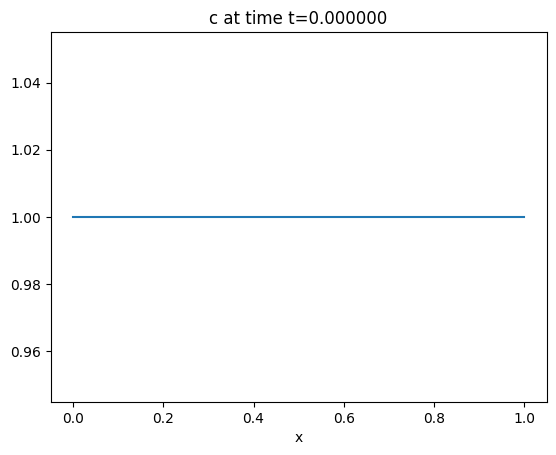

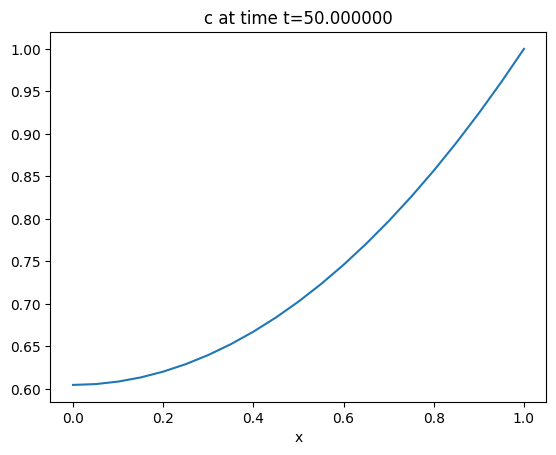

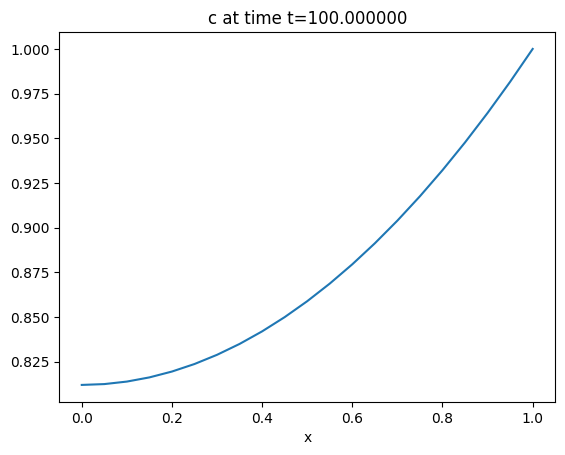

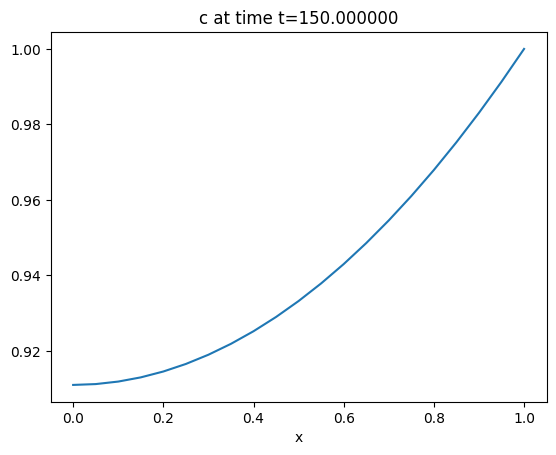

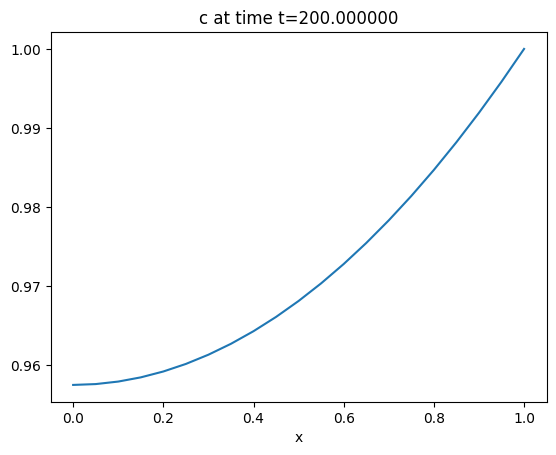

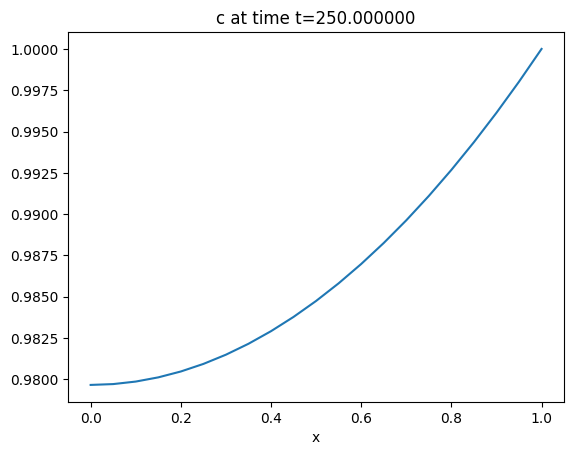

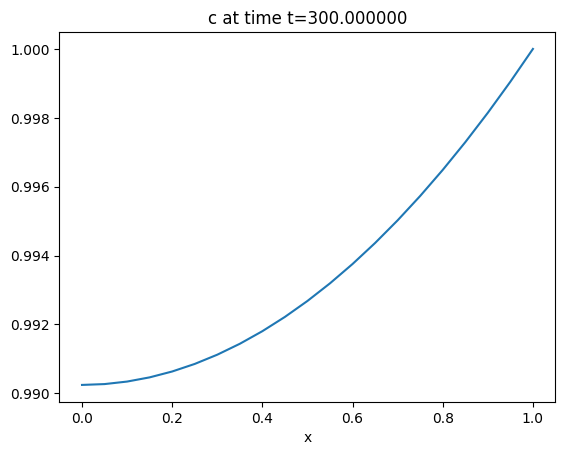

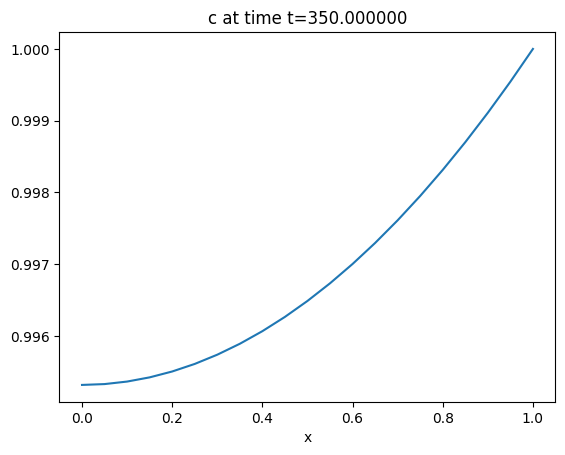

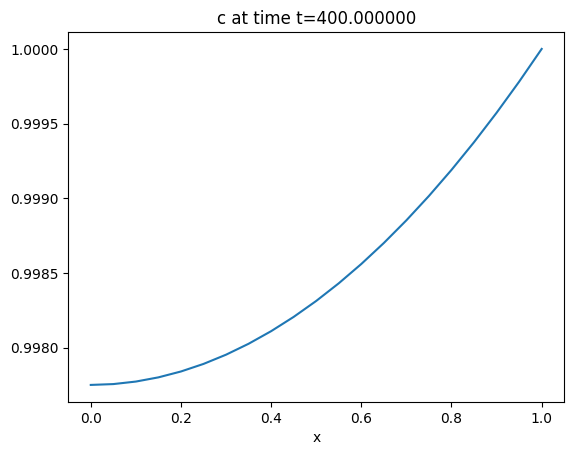

In [22]:
mesh1D = IntervalMesh(20,0,1)
V1D = FunctionSpace(mesh1D,'CG',1)
for i,c in enumerate(c_vect2):
    C.vector().set_local(c)
    c1D = interpolate(C,V1D)
    sol = plot(c1D)
    plt.title('c at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.show()

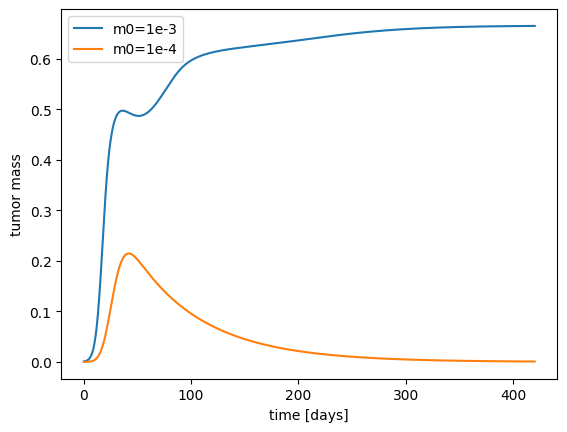

In [36]:
time = np.linspace(0.1,420,4199)
plt.plot(time,mass)
plt.plot(time,mass2)
plt.legend(['m0=1e-3','m0=1e-4'])
plt.xlabel('time [days]')
plt.ylabel('tumor mass')
plt.show()